<a href="https://colab.research.google.com/github/JOEL1706/data-Science/blob/main/clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler



In [ ]:
data= pd.read_csv("EastWestAirlines.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Data cleaning and Data proceesing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
data[data.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [ ]:
data.Qual_miles.unique()

array([    0,  2024,   500,   967,  5031,  1182,  1776,  1745,   733,
        2398,  1250,  2706,  2998,  2556,  6727,  1374,  1952,  2000,
        1178,  7210,  2015,  2066,  2128,  2919,  1024,   589,  2880,
        3445,   862,  8264,  1604,  2975,   588,  1199,  2586,  3490,
        5051,  1115,   810,  4081,  2376,   948,  6286,  2253,  2565,
        2643,  8559,  3818,  8753,  9325,  4301,  1094,  3692,  1896,
        1000,  1388,  4116,  2505, 11148,   888, 10098,   745,  5124,
        2408,   867,  1846,  1514,  8019,   763,  4924,  1697,  1739,
        2370,  6168,   925,  2288,  1467,  1704,  2329,  1099,  1505,
        6920,  2139,  4481,  1448,   250,   783,  2360,  2364,  2396,
        1362,  5583,  1440,  5009,   909,  2395,  3867,  1452,  6057,
        2081,  1112,  2704,  7663,  3953,  5513,  2454,   957,  4704,
        7558,  2562,  4727,  5368,  1754,   651, 10074,  2900,  1692,
        2600,  1526,  3508,   629,  1651,  1674,  2433,  1249,  2543,
        2738,  1619,

In [ ]:
data.drop(['ID#'],axis=1,inplace=True)

In [ ]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.reset_index(drop=True,inplace=True)

<Axes: >

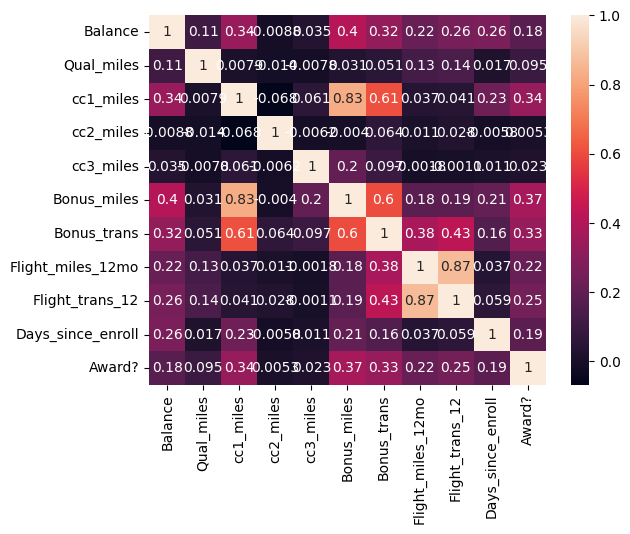

In [ ]:
sns.heatmap(data.corr(),annot=True)

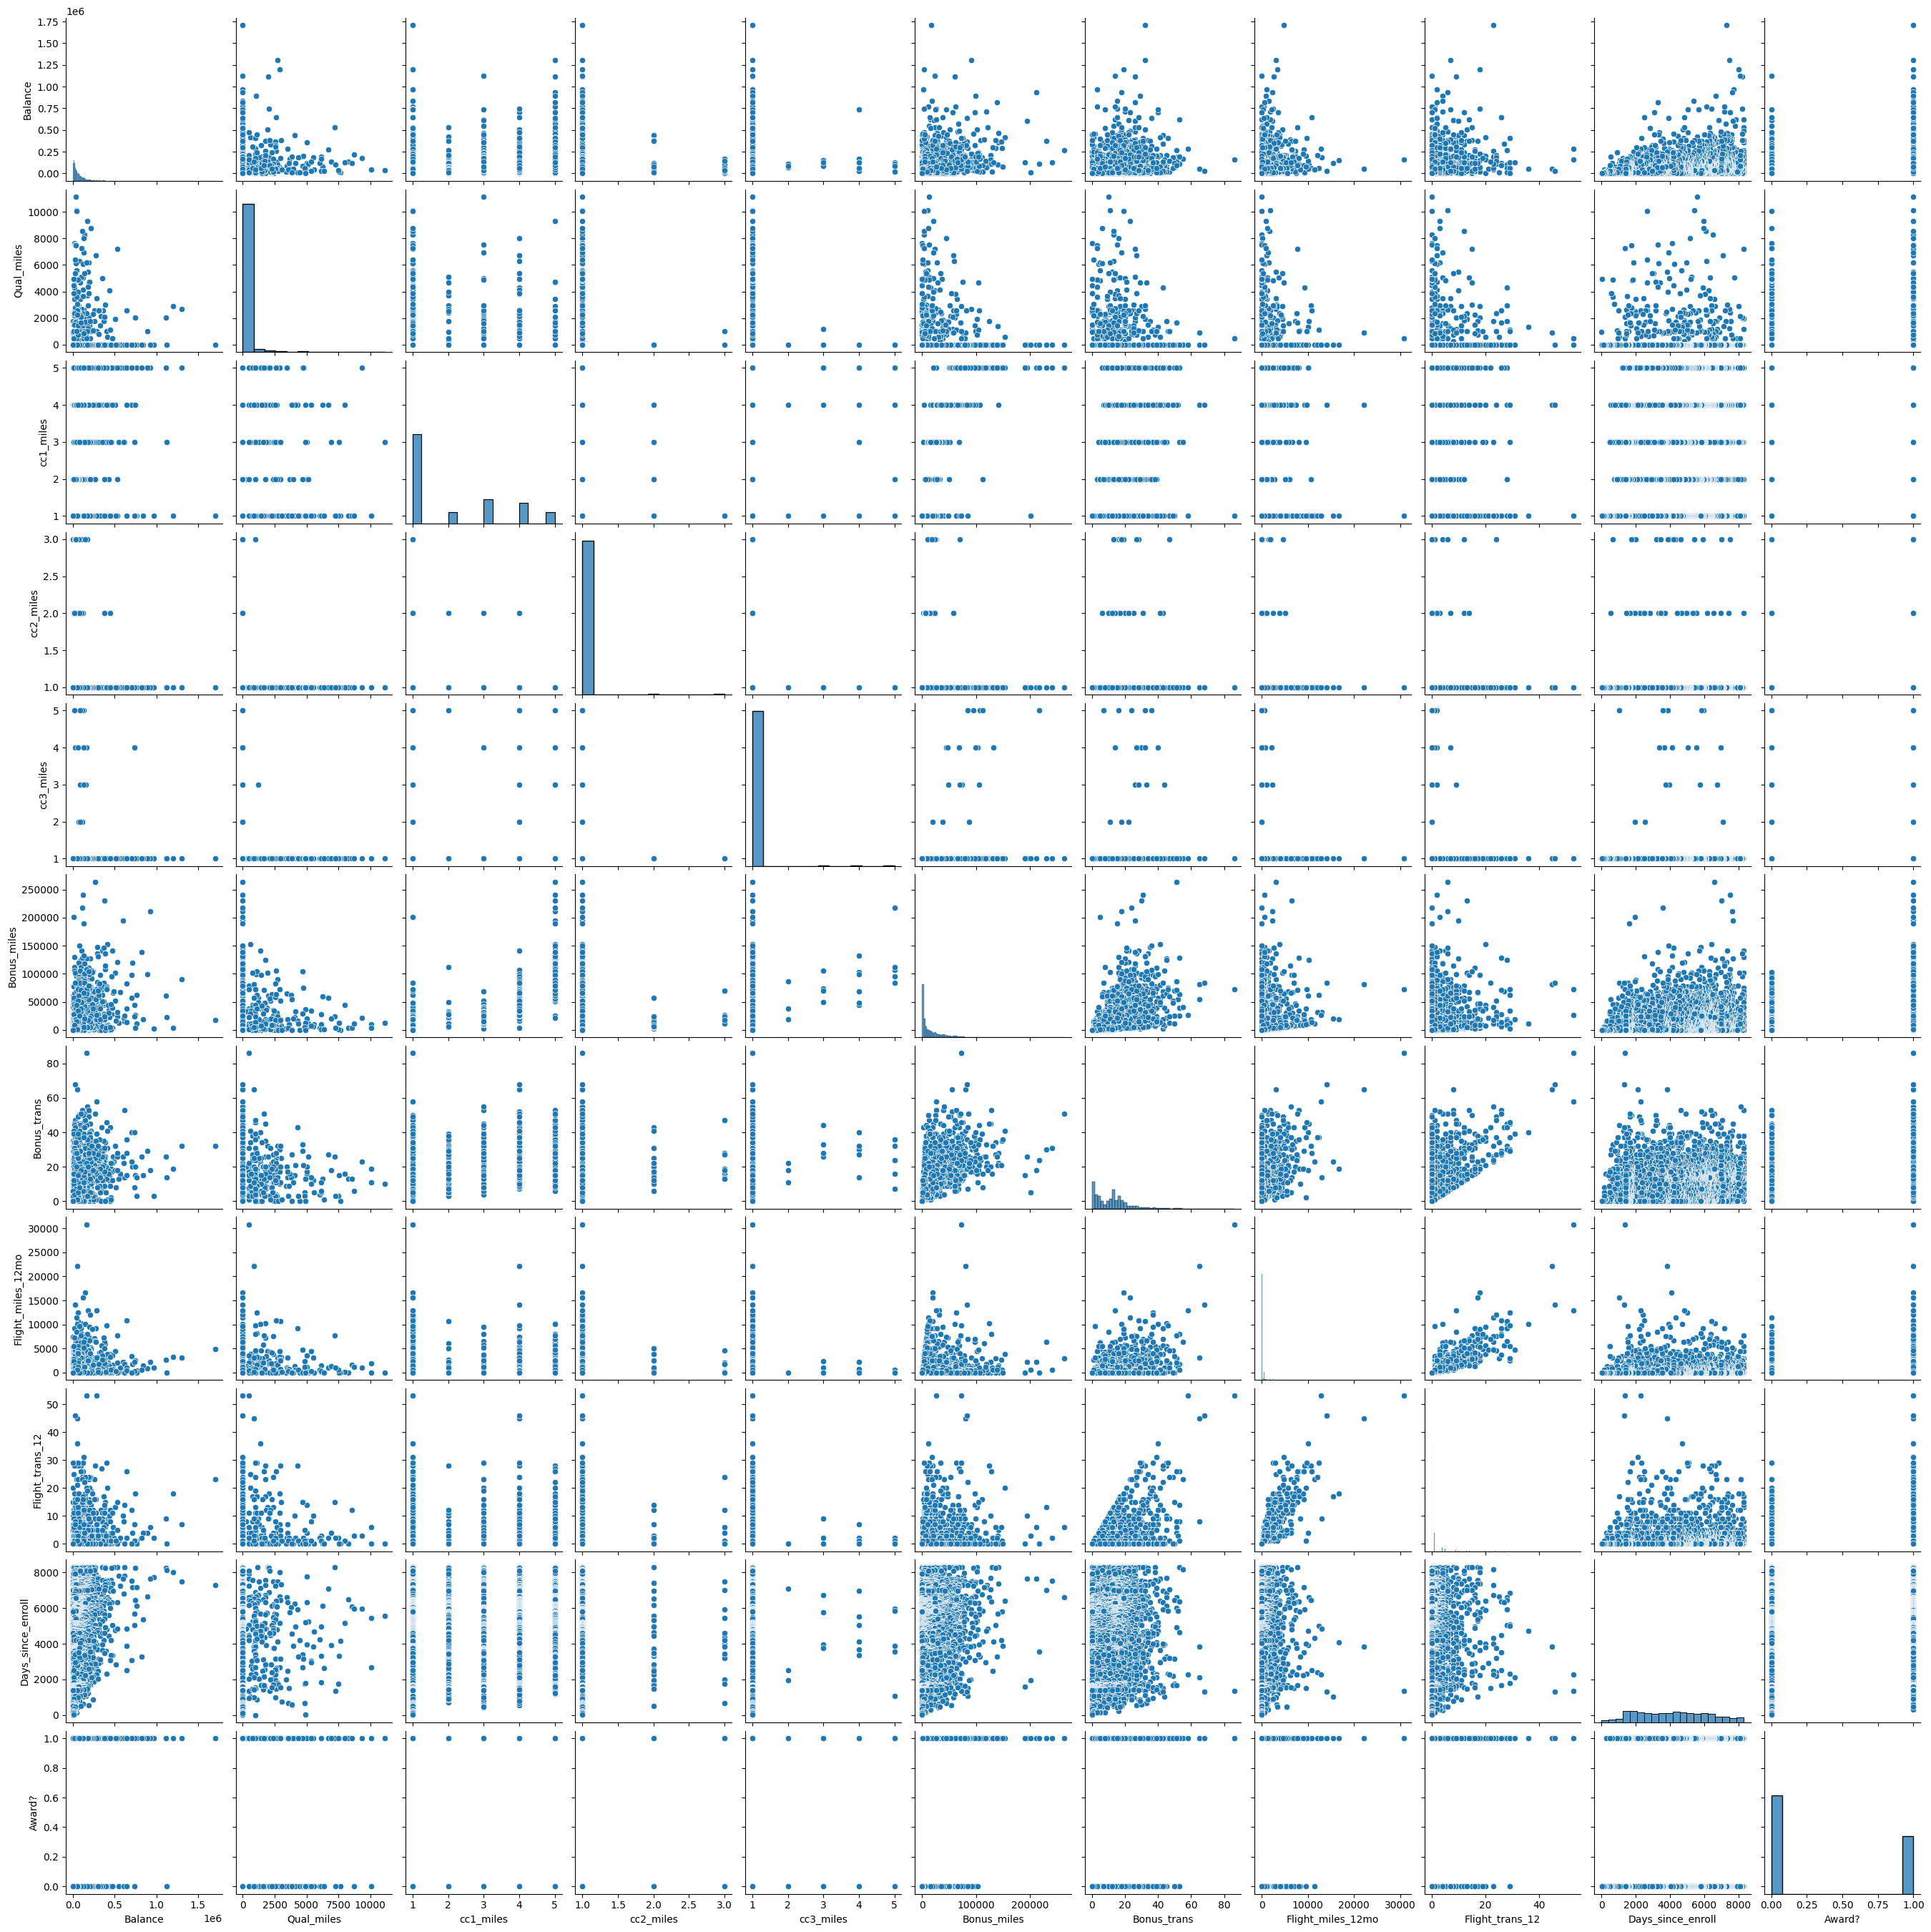

In [ ]:
sns.pairplot(data)

In [ ]:
data.corr(method='pearson')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


In [ ]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1
3994,64385,0,1,1,1,981,5,0,0,1395,1
3995,73597,0,3,1,1,25447,8,0,0,1402,1
3996,54899,0,1,1,1,500,1,500,1,1401,0


#Hierarchical-Clustering Technique

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data)

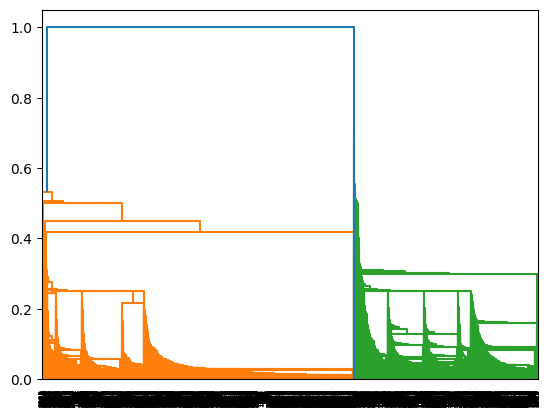

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

#K-Means-ClusteringTechnique

In [ ]:
model=KMeans(n_clusters=4).fit(df_norm)
model.inertia_

537.3943801827866

<function matplotlib.pyplot.show(close=None, block=None)>

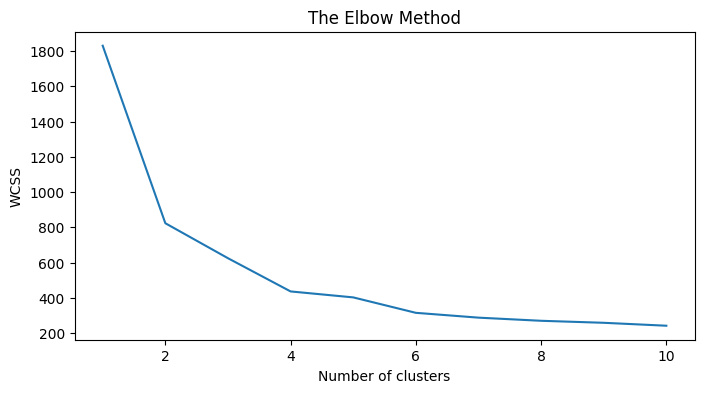

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(8,4))
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i).fit(df_norm)
  WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show

In [ ]:
clf=KMeans(n_clusters=4)
clf.fit(df_norm)


KMeans(n_clusters=4)

In [ ]:
y_names=clf.predict(df_norm)
y_names

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [ ]:
clf.cluster_centers_

array([[ 6.92010150e-02,  7.21537510e-03,  6.40350877e-01,
         7.97448166e-04,  5.58213716e-03,  1.17843075e-01,
         2.00289307e-01,  7.30214826e-03,  1.19466763e-02,
         5.38787863e-01, -3.33066907e-15],
       [ 2.37803979e-02,  8.07552260e-03,  2.24867725e-02,
         8.99470899e-03,  1.05820106e-03,  1.25816849e-02,
         7.51937984e-02,  7.36057007e-03,  1.24388539e-02,
         4.34552166e-01, -8.21565038e-15],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00]])

In [ ]:
clf.labels_

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [ ]:
clf.inertia_

436.6513303469022

In [ ]:
md=pd.Series(y_names)
df_norm['clust']=md
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3994,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3995,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,3
3996,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [ ]:
df_norm.iloc[:,0:].groupby(df_norm.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,0.069201,0.007215,0.640351,0.000797,0.005582,0.117843,0.200289,0.007302,0.011947,0.538788,0.0,0.0
1,0.023780,0.008076,0.022487,0.008995,0.001058,0.012582,0.075194,0.007361,0.012439,0.434552,0.0,1.0
2,0.048995,0.026054,0.039004,0.016345,0.002229,0.033564,0.121825,0.033427,0.059407,0.522892,1.0,2.0
3,0.063535,0.017791,0.728960,0.000619,0.006498,0.172970,0.234904,0.023160,0.040421,0.586139,1.0,3.0


In [ ]:
plt.style.use('classic')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: xlabel='Balance', ylabel='Qual_miles'>

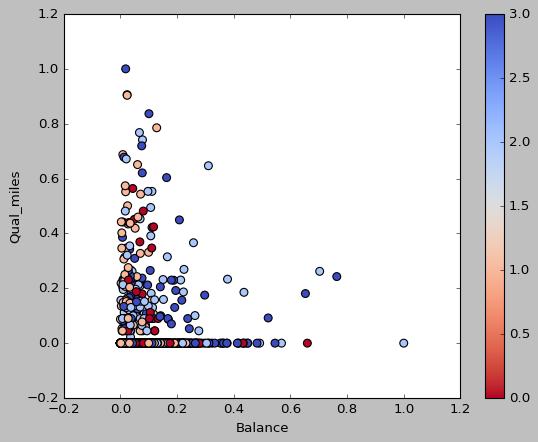

In [ ]:
df_norm.plot("Balance","Qual_miles",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [ ]:
import sklearn.metrics as metrics
metrics.silhouette_score(df_norm,clf.labels_)

0.6831485505305699

#DBSCAN -Clusterig Technique

In [ ]:
array=data.values

In [ ]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [ ]:
X

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [ ]:
dbscan = DBSCAN(eps=7.0, min_samples=11)
dbscan.fit(X)

DBSCAN(eps=7.0, min_samples=11)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3993,0
3994,0
3995,0
3996,0


In [ ]:
pd.concat([data,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,18476,0,1,1,1,8525,4,200,1,1403,1,0
3994,64385,0,1,1,1,981,5,0,0,1395,1,0
3995,73597,0,3,1,1,25447,8,0,0,1402,1,0
3996,54899,0,1,1,1,500,1,500,1,1401,0,0


<Axes: xlabel='Balance', ylabel='Bonus_miles'>

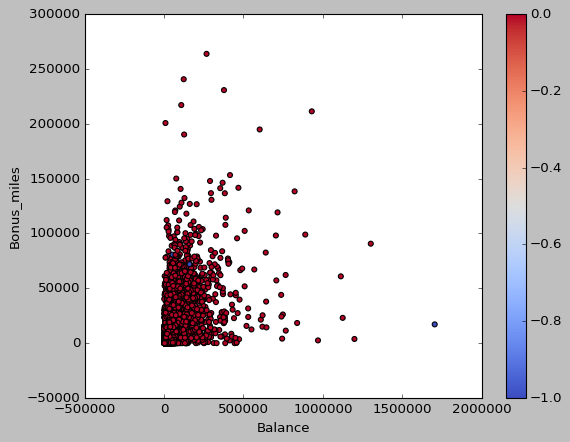

In [ ]:
data.plot(x="Balance",y="Bonus_miles",c=dbscan.labels_,kind="scatter",cmap="coolwarm")

In [ ]:
import sklearn.metrics as metrics
metrics.silhouette_score(X, dbscan.labels_)

0.8229224329816479

In [ ]:
from sklearn.neighbors import NearestNeighbors


In [ ]:
neigh= NearestNeighbors(n_neighbors=11)
nbrs=neigh.fit(X)
distances,indices=nbrs.kneighbors(X)

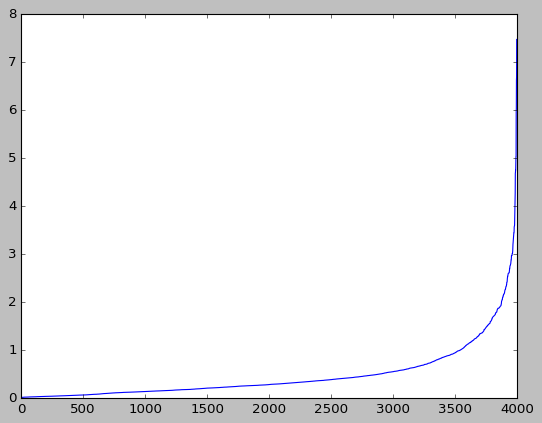

In [ ]:
distance=np.sort(distances,axis=0)
distance=distance[:,1]
plt.plot(distance)